<a href="https://colab.research.google.com/github/Guillermoddb/master/blob/master/Entrega4_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

In [3]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32')/255


In [5]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [0]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model



In [0]:
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [8]:
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136

In [9]:
encoder = Model(input_img, encoded)
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [10]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(train_images, train_images, epochs=15, batch_size=256, shuffle=True, validation_data=(test_images, test_images))

Epoch 1/15
235/235 [==============================] - 3s 12ms/step - loss: 0.0649 - val_loss: 0.0381
Epoch 2/15
235/235 [==============================] - 3s 11ms/step - loss: 0.0307 - val_loss: 0.0256
Epoch 3/15
235/235 [==============================] - 3s 11ms/step - loss: 0.0235 - val_loss: 0.0213
Epoch 4/15
235/235 [==============================] - 3s 11ms/step - loss: 0.0207 - val_loss: 0.0190
Epoch 5/15
235/235 [==============================] - 3s 11ms/step - loss: 0.0187 - val_loss: 0.0175
Epoch 6/15
235/235 [==============================] - 3s 11ms/step - loss: 0.0171 - val_loss: 0.0161
Epoch 7/15
235/235 [==============================] - 3s 11ms/step - loss: 0.0160 - val_loss: 0.0151
Epoch 8/15
235/235 [==============================] - 3s 11ms/step - loss: 0.0150 - val_loss: 0.0141
Epoch 9/15
235/235 [==============================] - 3s 11ms/step - loss: 0.0143 - val_loss: 0.0137
Epoch 10/15
235/235 [==============================] - 3s 12ms/step - loss: 0.0136 - val_lo

In [0]:
encoded_img = encoder.predict(test_images)
predicted = autoencoder.predict(test_images)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline


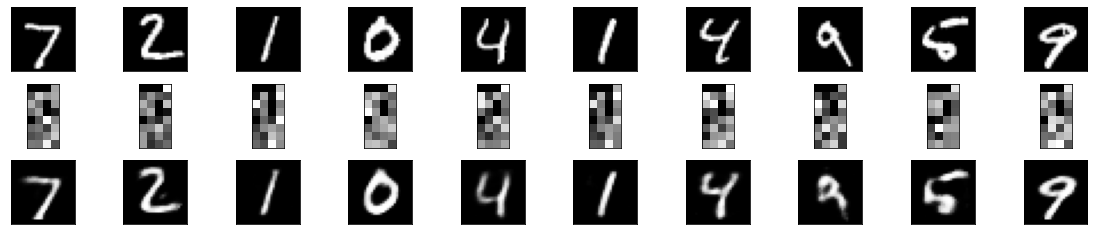

In [16]:
plt.figure(figsize=(40,4))
for i in range(10):
  ax = plt.subplot(3, 20, i + 1)
  plt.imshow(test_images[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, 20, i + 1 +20)
  plt.imshow(encoded_img[i].reshape(8,4))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, 20, 2 * 20 + i +1)
  plt.imshow(predicted[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [0]:
import numpy as np


In [0]:
train_images_noisy = train_images + np.random.normal(loc=0.0, scale=0.25, size=train_images.shape)

train_images_noisy = np.clip(train_images, 0.,1.)

test_images_noisy = test_images + np.random.normal(loc=0.0, scale=0.25, size=test_images.shape)

test_images_noisy = np.clip(test_images_noisy, 0.,1.)


In [19]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(train_images_noisy, train_images, epochs=15, batch_size=256, shuffle=True, validation_data=(test_images, test_images))

Epoch 1/15
235/235 [==============================] - 3s 12ms/step - loss: 0.0114 - val_loss: 0.0106
Epoch 2/15
235/235 [==============================] - 3s 12ms/step - loss: 0.0108 - val_loss: 0.0105
Epoch 3/15
235/235 [==============================] - 3s 12ms/step - loss: 0.0106 - val_loss: 0.0103
Epoch 4/15
235/235 [==============================] - 3s 12ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 5/15
235/235 [==============================] - 3s 12ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 6/15
235/235 [==============================] - 3s 12ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 7/15
235/235 [==============================] - 3s 12ms/step - loss: 0.0098 - val_loss: 0.0096
Epoch 8/15
235/235 [==============================] - 3s 12ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 9/15
235/235 [==============================] - 3s 12ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 10/15
235/235 [==============================] - 5s 20ms/step - loss: 0.0094 - val_lo

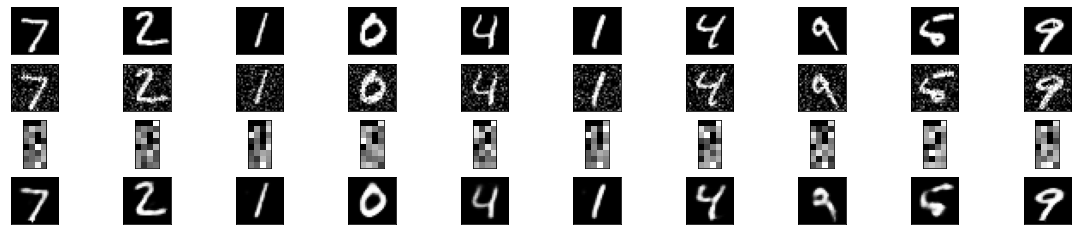

In [22]:
encoded_img = encoder.predict(test_images)
predicted = autoencoder.predict(test_images)

plt.figure(figsize=(40,4))
for i in range(10):
  ax = plt.subplot(4, 20, i + 1)
  plt.imshow(test_images[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(4, 20, i + 1 +20)
  plt.imshow(test_images_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(4, 20, i + 1 +20*2)
  plt.imshow(encoded_img[i].reshape(8,4))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(4, 20, 3* 20 + i +1)
  plt.imshow(predicted[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()